<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-valeriaarh/blob/main/TecMty_kmeans_target_A01240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad: K-means Target**

Ciencia y Analítica de datos

Alumna: Valeria Alejandra Ramirez Herrera

Matricula: A01240716

Profesor: Dr. María de la Paz Rico

Fecha: 09/Noviembre/2022

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)
df

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468
...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224


Exploremos los datos.

In [ ]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

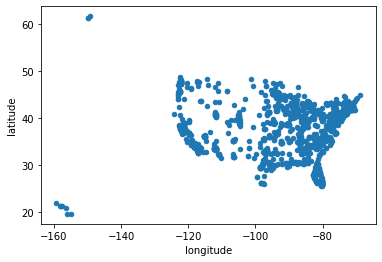

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

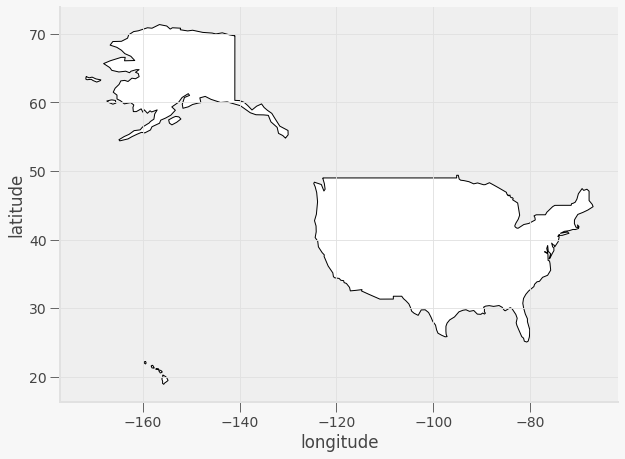

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

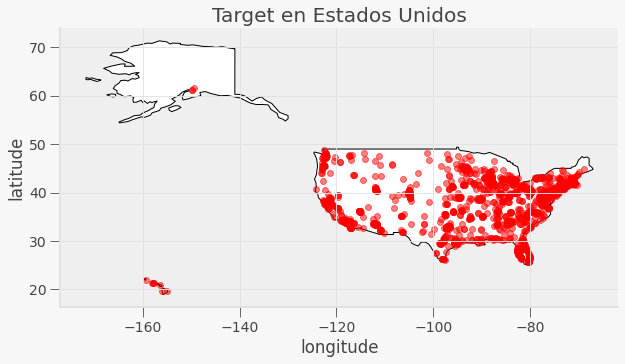

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

##**Ejercicio**
Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.




In [ ]:
#Importación de librerías 

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
#Se toma la información previamente definida donde se juntan los datos de latitud y longitud
long_lat=list(zip(df.longitude, df.latitude))

#Se defina función make_blobs para tener la información en coordenadas Gaussiana y crear las burbujas
blob_centers = long_lat

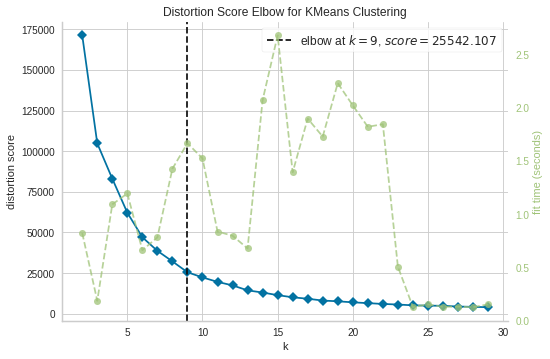

In [ ]:
#Se crean las entradas y las salidas en base al n_samples (renglones del dataset)
X, y = make_blobs(n_samples=1839, centers=blob_centers, cluster_std=0.20,
                  random_state=42)

# Se usa el modelo KElbowVisualizer para encontrar el mejor valor de k y saber cuántos clusters se tienen que hacer y cuántos almacenes se pueden proponer
#El valor de k a buscar va entre 2 y 30
model = KElbowVisualizer(KMeans(), k=(2,30))
model.fit(X)
model.show()

In [ ]:
#En este caso el valor de k=8, y usaremos este valor para el entrenamiento de las entradas y las predicciones de la salida.
k = model.elbow_value_

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
#Se crea la función para graficar dónde podrían ir los almacenes 
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

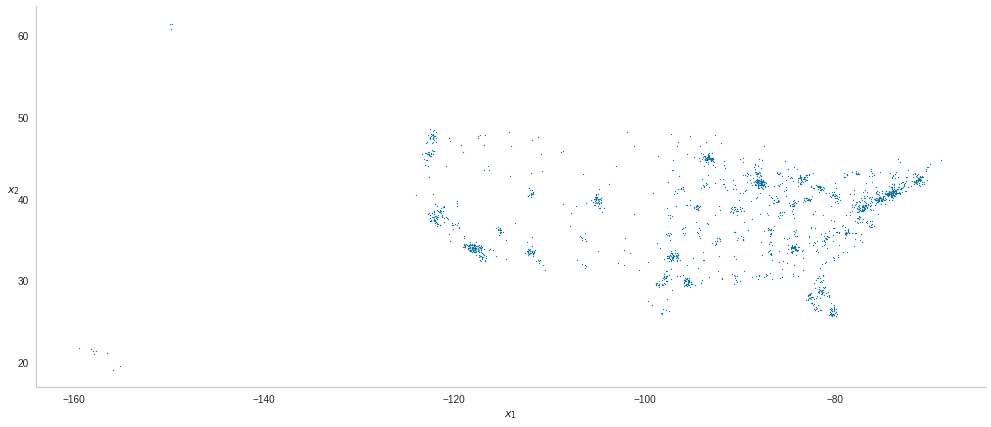

In [ ]:
#Se obtiene la gráfica
plt.figure(figsize=(17, 7))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

**Encuentra las latitudes y longitudes de los almacenes**

In [ ]:
#A continuación se muestran las latitudes y longitudes para las propuestas de almacenes (8 propuestas porque k=8)
Clusters= kmeans.cluster_centers_
Clusters

array([[-118.9395852 ,   35.43123455],
       [ -82.44559961,   31.1312363 ],
       [ -96.09110803,   31.78619918],
       [ -94.0356954 ,   43.11677621],
       [-122.63109527,   46.97755989],
       [-108.63150503,   37.44355794],
       [ -86.26562249,   40.84234198],
       [ -75.2401236 ,   40.36468462],
       [-157.31816631,   20.8436751 ]])

In [ ]:
# Se define la funcion location para poder graficar la latitud y longitud de los Clusters encontrados

def locations(Clusters):
    Clusters = pd.DataFrame(Clusters, columns = ['Lat','Long'])
    Clusters["Coordinates"] = list(zip(Clusters.Lat, Clusters.Long))
    Clusters["Coordinates"] = Clusters["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(Clusters, geometry="Coordinates")

    fig, gax = plt.subplots(figsize=(10,10))

    world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

    gdf.plot(ax=gax, color='Green', alpha = 0.5)

    gax.set_xlabel('Longitude')
    gax.set_ylabel('Latitude')
    gax.set_title('Propuestas en Estados Unidos')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)
    return plt.show()


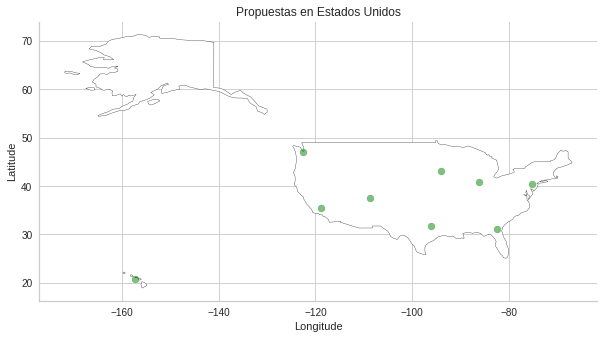

In [ ]:
#Se crea la gráfica con las 8 posibles ubicaciones de los almacenes
locations(Clusters)

In [ ]:
# En base a las ubicaciones dadas en el mapa se toma la información de cada almacén

closest, _ = pairwise_distances_argmin_min(Clusters, X)
print("ID de almacén:",closest)
print("Dirección de cada una de estas tiendas\n")
users=df['address'].values
for row in closest:
    print(users[row])

ID de almacén: [  23  306  540  143 1688 1483 1542 1027 1626]
Dirección de cada una de estas tiendas

1200 N Muldoon Rd, Anchorage, AK 99504-6103
15700 E Briarwood Cir, Aurora, CO 80016-1558
633 N Milwaukee St, Boise, ID 83704-9139
11051 Victory Blvd, North Hollywood, CA 91606-3719
14391 Chantilly Crossing Ln, Chantilly, VA 20151-2118
2000 9th Ave SE, Watertown, SD 57201-5352
201 E Central Texas Expy, Harker Heights, TX 76548-2747
333 N 48th St, Lincoln, NE 68504-3505
19955 Katy Fwy, Houston, TX 77094-1019


**¿Qué ciudad es?**

In [ ]:
#Se hace el split de la información presentada en la línea pasada y se obtiene la ciudad que corresponde a cada almacén

almacen = df["address"].str.split(',',expand=True)
almacen.columns = ['Direccion', 'Ciudad','Estado','Telefono']

ciudad = almacen["Ciudad"].str.split(expand=True)
ciudad = ciudad[0]

closest, _ = pairwise_distances_argmin_min(Clusters, X)
users = ciudad.values
ciudades = list()
for row in closest:
    ciudades.append(users[row])

print(ciudades)

['Anchorage', 'Aurora', 'Boise', 'North', 'Chantilly', 'Watertown', 'Harker', 'Lincoln', 'Houston']


**¿A cuántas tiendas va surtir?**

In [ ]:
# En esta sección de código obtenemos la cantidad de tiendas a las cuales, cada almacén debe dar abasto
# Dando en total las 1839

referencias=[ciudades[0],ciudades[1],ciudades[2],ciudades[3],ciudades[4],ciudades[5],ciudades[6],ciudades[7]]

lista_almacenes =  pd.DataFrame()
lista_almacenes['usuario']= df['latitude'].values
lista_almacenes['categoria']= df['longitude'].values
lista_almacenes['label'] = y_pred;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Almacén propuesto '] = referencias
cantidadGrupo['Cantidad de Tiendas a dar abasto']=lista_almacenes.groupby('label').size()
cantidadGrupo

,Almacén propuesto,Cantidad de Tiendas a dar abasto
0,Anchorage,219
1,Aurora,260
2,Boise,204
3,North,151
4,Chantilly,73
5,Watertown,131
6,Harker,341
7,Lincoln,452


**¿Sabes a qué distancia estará?**

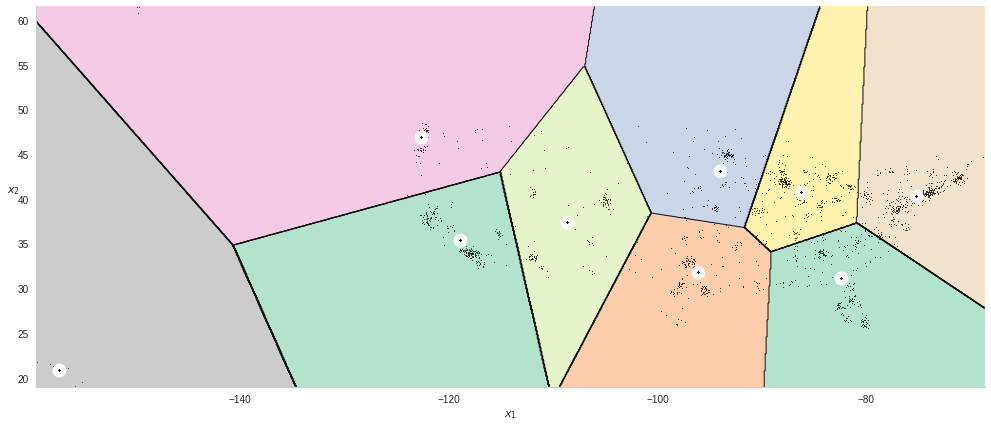

Tabla: Lejanía de almacenes vs tiendas


,"(Anchorage,)","(Aurora,)","(Boise,)","(North,)","(Chantilly,)","(Watertown,)","(Harker,)","(Lincoln,)","(Houston,)"
0,,,,,,,,,
Alabaster,1.0,37.0,23.0,27.0,13.0,11.0,33.0,44.0,41.0
Bessemer,23.0,16.0,7.0,5.0,27.0,12.0,11.0,21.0,63.0
Daphne,32.0,14.0,15.0,6.0,34.0,21.0,4.0,14.0,73.0
Decatur,3.0,35.0,21.0,25.0,15.0,10.0,32.0,43.0,42.0
Dothan,4.0,40.0,27.0,29.0,9.0,13.0,36.0,47.0,39.0
...,...,...,...,...,...,...,...,...,...
Waukesha,2.0,35.0,22.0,25.0,14.0,10.0,32.0,43.0,42.0
Waukesha,28.0,16.0,13.0,2.0,30.0,17.0,7.0,18.0,69.0
Casper,39.0,5.0,16.0,16.0,44.0,29.0,8.0,7.0,79.0


In [ ]:
# Se definen las funciones para graficar la cobertura de cada uno de los almacenes.

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 7))
plot_decision_boundaries(kmeans, X)
plt.show()
#Cada punto representa la distancia de cada almacén a las tiendas (rengloes) y dependerá de la cercanía o lejanía a ellas.

tienda_xciudad=pd.DataFrame(ciudades)

print('Tabla: Lejanía de almacenes vs tiendas')
Distance=pd.DataFrame(kmeans.transform(X).round(0))
Distance=Distance.set_axis(tienda_xciudad,axis=1)
Distance=Distance.set_axis(ciudad,axis=0)
Distance

##**Análisis**
- Encuentra el numero ideal de almacenes, ¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?

  El número ideal de almacenes se encontró fue de 8, esto se hizo a través del método Elbow, lo que nos ayuda encontrar el mejor número de clusters/grupos para el conjunto de datos. A partir del número óptimo de clusters se recurrió a la función Kmeans donde precisamente se hizo la agrupación de los datos en los 8 clusters para obtener una propuesta para de 8 los almacenes a dar servicio a las tiendas y tener una óptima cobertura a lo largo del país, como se pudo ver en la representación gráfica de USA.


- Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, despues nos auxiliamos de una librería de datos geograficos.

  - ¿qué librerías nos pueden ayudar a graficar este tipo de datos?
    
    Para Python estas son algunas de las librerías que podrían ser útiles:
    - Matplotlib - Previamente usada
    - Seaborn - Revisión de datos en Mapas de calor, matrices, scatter plots.
    - Geoplotlib - Trabajar con datos geográficos como se pudo ver en este ejercicio.
    - Scikit learn - con la funcion make_blobs, como también se usó en el ejercicio para hacer las agrupaciones/burbujas de los datos. silhouette_samples, etc.
    - Otras como: CartoPy, Geopandas, Geemap.
    
  - ¿Consideras importante que se grafique en un mapa?, ¿por qué?
    
    Para mí, sí fue importante que este ejercicio se representara en un mapa ya que hace más fácil visualizar cómo estarían distribuídos los almacenes a lo largo de USA y confirmar si hacía sentido la posición de los mismos y la cobertura que tendrían.

  - Agrega las conclusiones

  El método de k-means se me hizo muy interesante, sobre todo la forma en hacer las agrupaciones o clusters de la información para al final tomar la decisión. Al final este es un algoritmo que nos permite hacer clasificaciones basádas en las características de los datos disponibles, especialmente en casos donde se necesita encontrar grupos ocultos en un dataset no etiquetado. Para este ejercicio se tomó el número de Elbows de manera automática ya que debido a la gran cantidad de datos en el dataset sería complicado porque podríamos tener cluster de más o de menos lo cual implicaría un problema al momento de la clasificación en la logística de Target, y al final del ejercicio tenemos el número óptimo de almacenes para cubrir todo el país y que cada almacén sea capaz de surtir las tiendas basandose en la distancia o centroides de cada tienda-almacén y todas tengan el abasto necesario en tiempo con el menor costo logístico posible.

##**Referencias**

- UniOviedo. (n.d.). El algoritmo k-means aplicado a clasificación y procesamiento de imágenes. Retrieved from UniOviedo: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html#:~:text=K%2Dmeans%20es%20un%20algoritmo,suele%20usar%20la%20distancia%20cuadr%C3%A1tica.
- Platzi. (n.d.). Método Elbow, para elegir el número ideal de clusters. Retrieved from Platzi: https://platzi.com/tutoriales/2127-intro-algebra/11447-metodo-elbow-para-elegir-el-numero-ideal-de-clusters/#:~:text=El%20m%C3%A9todo%20Elbow%20o%20**,elemento%20con%20su%20centroide%20correspondiente.
- Frogames. (2020, November 06). Las 6 principales librerias de visualización de datos para Python. Retrieved from Frogames: https://frogames.es/las-6-principales-librerias-de-visualizacion-de-datos-para-python/
Aprende Machine Learning. (2018, March 12). K-Means en Python paso a paso. Retrieved from Aprende Machine Learning: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
 
